 $$efr(x) = \frac{2}{\sqrt{\mathrm{\pi}}}\int_0^x \mathrm{e}^{-t^{2}}\,\mathrm{d}t$$

## 1 Ряд Тейлора

In [1]:
import math 
import matplotlib.pyplot as plt

def Summa(Xi_list, eps):
    result = []
    for x in Xi_list:
        n = 0
        r = x
        s = 0
        xx = x*x
        while abs(r)>=eps:
            s += r
            q = (-1)*xx*(2*n+1)/(n+1)/(2*n+3)
            r = r*q
            n += 1
        result.append(2/math.sqrt(math.pi)*s)
    return result

eps = 0.000001
Xi_list = []
for i in range(-30,31,1):
    Xi_list.append(i/10)
Fi_list = Summa(Xi_list, eps).copy()

print ("epsilon = ", eps)
for i in range(len(Xi_list)):
    print('f(',Xi_list[i],') =', Fi_list[i], ';')

epsilon =  1e-06
f( -3.0 ) = -0.9999773727814575 ;
f( -2.9 ) = -0.9999580152336394 ;
f( -2.8 ) = -0.9999254026722088 ;
f( -2.7 ) = -0.9998664655960748 ;
f( -2.6 ) = -0.9997635470749017 ;
f( -2.5 ) = -0.9995932761488175 ;
f( -2.4 ) = -0.9993120448503049 ;
f( -2.3 ) = -0.9988564772929538 ;
f( -2.2 ) = -0.9981373782937998 ;
f( -2.1 ) = -0.9970212570231596 ;
f( -2.0 ) = -0.9953217200763727 ;
f( -1.9 ) = -0.9927908634308578 ;
f( -1.8 ) = -0.989090134353693 ;
f( -1.7 ) = -0.9837907896635323 ;
f( -1.6 ) = -0.9763480639682841 ;
f( -1.5 ) = -0.9661054777937463 ;
f( -1.4 ) = -0.9522847480723241 ;
f( -1.3 ) = -0.9340083988187119 ;
f( -1.2 ) = -0.9103133702966623 ;
f( -1.1 ) = -0.8802059709831409 ;
f( -1.0 ) = -0.8427009429420883 ;
f( -0.9 ) = -0.7969079584713372 ;
f( -0.8 ) = -0.7421014550168195 ;
f( -0.7 ) = -0.6778012610468778 ;
f( -0.6 ) = -0.603855940145736 ;
f( -0.5 ) = -0.5205002809390846 ;
f( -0.4 ) = -0.42839239010767893 ;
f( -0.3 ) = -0.32862665813087827 ;
f( -0.2 ) = -0.2227029304401948

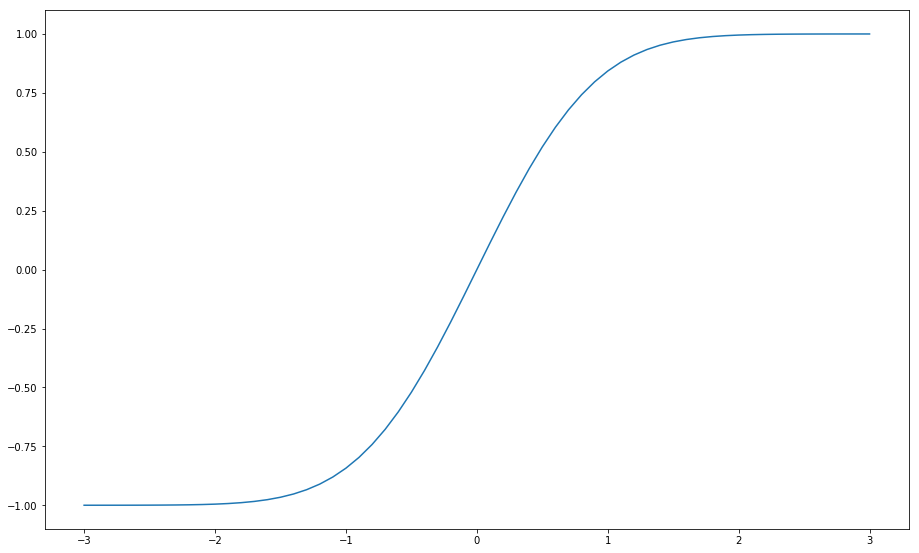

In [2]:
fig= plt.figure(figsize=(15,9))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(Xi_list, Fi_list)
plt.savefig('foo.png')

## 2 Интерполяционный полином в форме Лагранжа на равномерно распределенных узлах

In [3]:
eps = 0.000001
Xi_list = []
for i in range(0,41,2):
    Xi_list.append(i/20)
Fi_list = Summa(Xi_list, eps).copy()
print ("epsilon = ", eps)
for i in range(len(Xi_list)):
    print('f(',Xi_list[i],') =', Fi_list[i], ';')

epsilon =  1e-06
f( 0.0 ) = 0.0 ;
f( 0.1 ) = 0.11246291869968651 ;
f( 0.2 ) = 0.22270293044019487 ;
f( 0.3 ) = 0.32862665813087827 ;
f( 0.4 ) = 0.42839239010767893 ;
f( 0.5 ) = 0.5205002809390846 ;
f( 0.6 ) = 0.603855940145736 ;
f( 0.7 ) = 0.6778012610468778 ;
f( 0.8 ) = 0.7421014550168195 ;
f( 0.9 ) = 0.7969079584713372 ;
f( 1.0 ) = 0.8427009429420883 ;
f( 1.1 ) = 0.8802059709831409 ;
f( 1.2 ) = 0.9103133702966623 ;
f( 1.3 ) = 0.9340083988187119 ;
f( 1.4 ) = 0.9522847480723241 ;
f( 1.5 ) = 0.9661054777937463 ;
f( 1.6 ) = 0.9763480639682841 ;
f( 1.7 ) = 0.9837907896635323 ;
f( 1.8 ) = 0.989090134353693 ;
f( 1.9 ) = 0.9927908634308578 ;
f( 2.0 ) = 0.9953217200763727 ;


In [4]:
import matplotlib.pyplot as plt

def IP_Lag(X_list, Xi_list, Fi_list):
    L_list = []
    for x in X_list:
        L = 0
        for i in range(len(Xi_list)):
            l = 1
            for j in range(len(Xi_list)):
                if (j!=i):               
                    l*= (x-Xi_list[j])/(Xi_list[i]-Xi_list[j])
                  #  print(Xi_list[j], Fi_list[i], ';')
            L += l*Fi_list[i]
        L_list.append(L)
    return L_list

UniformX_list = []
for i in range(0,21,1):
    UniformX_list.append(i/10)
UniformF_list = Summa(UniformX_list, eps).copy()

X_list = []
for i in range(0,41,1):
    X_list.append(i/20)
F_list = Summa(X_list, eps).copy()

Res_list = IP_Lag(X_list, UniformX_list, UniformF_list).copy()
Err = []
for i in range(len(Res_list)):
    Err.append(abs(Res_list[i]-F_list[i]))
print("Погрешность в узлах интерполяции: ", Err) 


Погрешность в узлах интерполяции:  [0.0, 0.0007764566523086741, 0.0, 6.401133999692221e-05, 0.0, 9.571456938473055e-06, 0.0, 1.8194510033042732e-06, 0.0, 8.17238098416162e-07, 0.0, 2.9300085579997415e-08, 0.0, 3.3435611057619496e-07, 0.0, 1.5767538485977894e-07, 0.0, 3.23606381691377e-07, 0.0, 2.571541419804646e-07, 0.0, 4.6798505848322236e-07, 0.0, 3.9720033795376253e-07, 0.0, 6.166238170068894e-07, 0.0, 8.445060893924605e-07, 0.0, 2.907000488105993e-07, 0.0, 1.623057620081525e-06, 0.0, 5.805962554839006e-06, 0.0, 2.4679698718221843e-05, 0.0, 0.00015222197767750245, 0.0, 0.0016777529943804437, 0.0]


In [5]:
X_list = []
for i in range(0,31,1):
    X_list.append(i/15)
F_list = Summa(X_list, eps).copy()

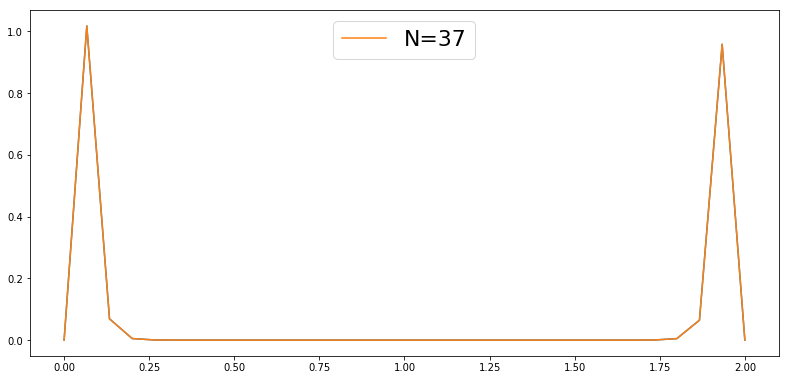

In [6]:
import pylab

UniformX_list = []
N=37
for i in range(0,N,1):
    UniformX_list.append(2*i/(N-1))
UniformF_list = Summa(UniformX_list, eps).copy()

Res_list = IP_Lag(X_list, UniformX_list, UniformF_list).copy()
Err = []
for i in range(len(Res_list)):
    Err.append(abs(Res_list[i]-F_list[i]))

fig= plt.figure(figsize=(13,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X_list, Err)
pylab.plot (X_list, Err, "-", label = "N="+str(N))
pylab.legend (loc=9, prop={'size': 22})
plt.savefig('err' + str(N) +'.png')

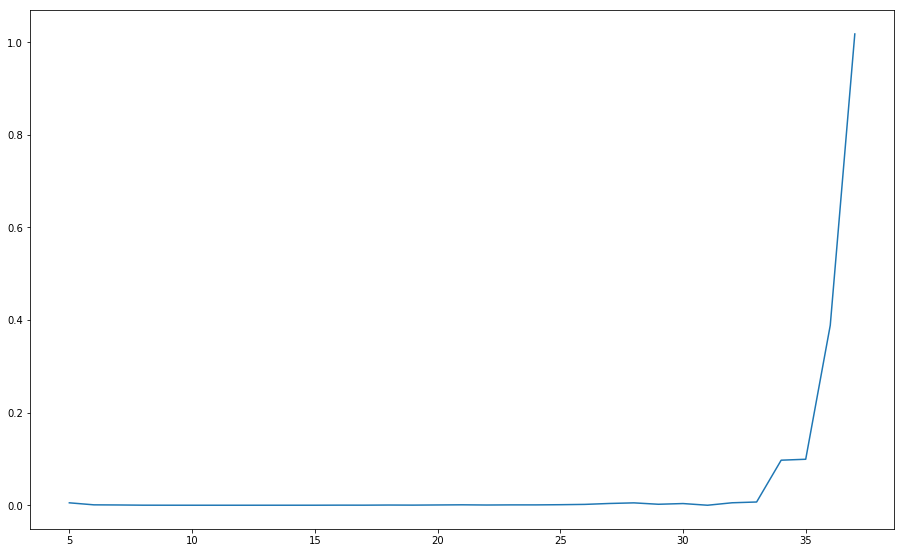

In [7]:
Err = []
num_n = [] 
max_n= 38
for i in range(5, max_n):
    num_n.append(i)
    Err.append(0)
    
for n in range(5, max_n):
    UniformX_list = []
    for j in range(0,n,1):
        UniformX_list.append(j*2/(n-1))
    UniformF_list = Summa(UniformX_list, eps).copy()

    Res_list = IP_Lag(X_list, UniformX_list, UniformF_list).copy()
    for i in range(len(Res_list)):
        buf = abs(Res_list[i]-F_list[i])
        if (buf > Err[n-5]):
            Err[n-5] = buf 

fig= plt.figure(figsize=(15,9))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(num_n, Err)
plt.savefig('Character_err.png')

### 2.1 Характерный вид графика

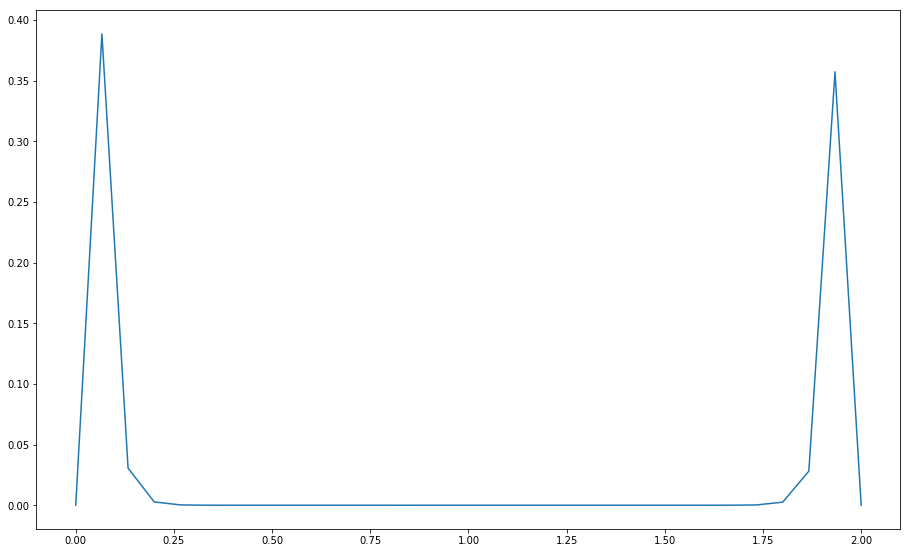

In [8]:
UniformX_list = []
for i in range(0,36,1):
    UniformX_list.append(i/17.5)
UniformF_list = Summa(UniformX_list, eps).copy()

Res_list = IP_Lag(X_list, UniformX_list, UniformF_list).copy()
Err = []
for i in range(len(Res_list)):
    Err.append(abs(Res_list[i]-F_list[i]))


fig= plt.figure(figsize=(15,9))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X_list, Err)
plt.savefig('Character_err.png')

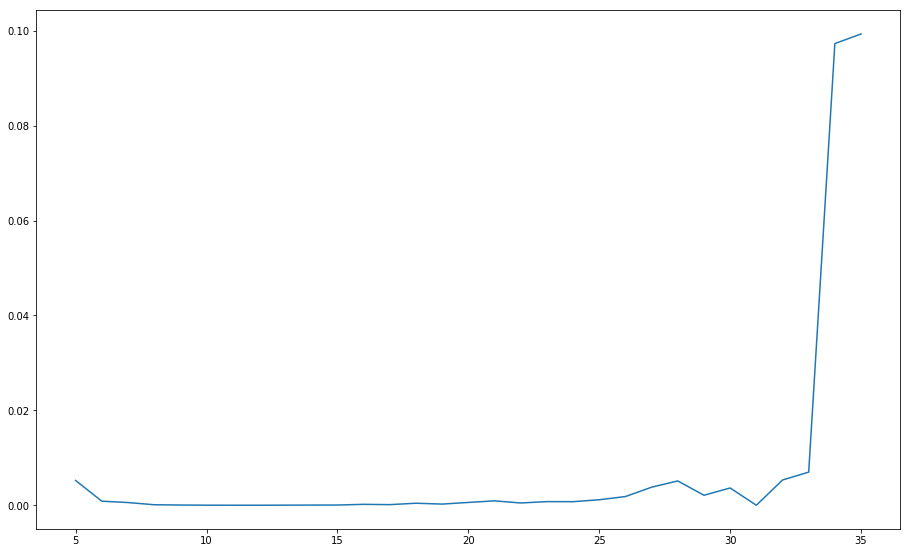

In [9]:
Err = []
num_n = [] 
max_n= 36
for i in range(5, max_n):
    num_n.append(i)
    Err.append(0)
    
for n in range(5, max_n):
    UniformX_list = []
    for j in range(0,n,1):
        UniformX_list.append(j*2/(n-1))
    UniformF_list = Summa(UniformX_list, eps).copy()

    Res_list = IP_Lag(X_list, UniformX_list, UniformF_list).copy()
    for i in range(len(Res_list)):
        buf = abs(Res_list[i]-F_list[i])
        if (buf > Err[n-5]):
            Err[n-5] = buf 

fig= plt.figure(figsize=(15,9))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(num_n, Err)
plt.savefig('Character_err.png')

### 2.2 Построение интерполяционного полинома на узлах Чебышева

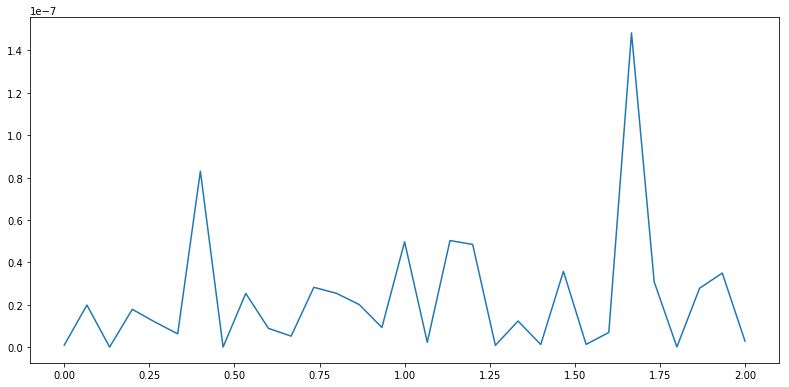

In [10]:
TX_list = []
n=605
for i in range(n+1):
    TX_list.append(1+math.cos(math.pi*(2*i+1)/(2*(n+1))))
TF_list = Summa(TX_list, eps).copy()

Res_list = IP_Lag(X_list, TX_list, TF_list).copy()
Err = []
for i in range(len(Res_list)):
    Err.append(abs(Res_list[i]-F_list[i]))

fig= plt.figure(figsize=(13,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(X_list, Err)
plt.savefig('Cheb_err.png')

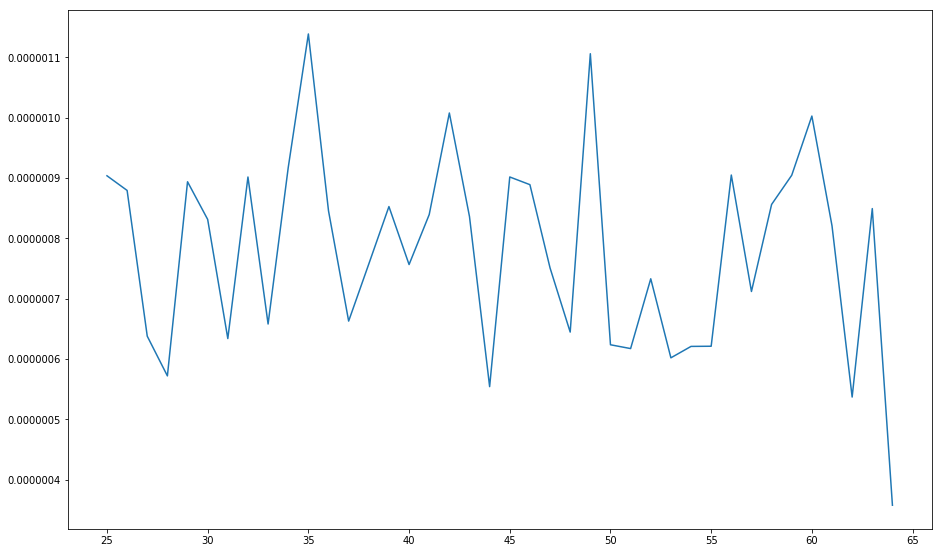

In [11]:
Err = []
num_n = [] 
min_n = 25
max_n= 65
for i in range(min_n , max_n):
    num_n.append(i)
    Err.append(0)
    
for n in range(min_n , max_n):
    TX_list = []
    for i in range(n+1):
        TX_list.append(1+math.cos(math.pi*(2*i+1)/(2*(n+1))))
    TF_list = Summa(TX_list, eps).copy()

    Res_list = IP_Lag(X_list, TX_list, TF_list).copy()
    for i in range(len(Res_list)):
        buf = abs(Res_list[i]-F_list[i])
        if (buf > Err[n-min_n ]):
            Err[n-min_n ] = buf 

fig= plt.figure(figsize=(15,9))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(num_n, Err)
plt.savefig('Character_Cheb_err.png')

## 3 Приближенное вычисление интегралов

In [12]:
import math
def f(t):
    return 2/math.sqrt(math.pi)*math.exp((-1)*t*t)

In [13]:
def L_Rect(x, N, last_S , eps):
    S = 0
    
    for i in range(N):
        S += f(i/N*x) * (x/N)
        
    if (abs(last_S - S) < eps):
        return S, N
    else:
        return L_Rect(x, N*2, S, eps)

In [14]:
def Cent_Rect(x, N, last_S , eps):
    S = 0
    
    for i in range(N):
        S += f((2*i+1)*x/N/2) * (x/N)
        
    if (abs(last_S - S) < eps):
        return S, N
    else:
        return Cent_Rect(x, N*2, S, eps)

In [15]:
def Trap(x, N, last_S , eps):
    S = 0
    
    for i in range(N):
        S += (f((i+1)/N*x) + f(i/N*x))/2 * (x/N)
        
    if (abs(last_S - S) < eps):
        return S, N
    else:
        return Trap(x, N*2, S, eps)

In [16]:
def Simpson(x, N, last_S , eps):
    S = 0
    
    for i in range(N):
        Xi = i/N*x
        next_Xi = (i+1)/N*x
        S += (f(next_Xi) + 4*f((2*i+1)*x/N/2) + f(Xi))/6 * (next_Xi - Xi)
        
    if (abs(last_S - S) < eps):
        return S, N
    else:
        return Simpson(x, N*2, S, eps)

In [17]:
def Gauss(x, N, last_S , eps):
    S = 0
    hN = (x/N)/2
    buf = 1/(3**(1/2))
    
    for i in range(0,N):
        Zi = (i/N)*x
        S += hN * (f(Zi + hN*(1-buf)) + f(Zi + hN*(1+buf)))
        
    if (abs(last_S - S) < eps):
        return S, N
    else:
        return Gauss(x, N*2, S, eps)

In [18]:
import pandas as pd

ListG, ListS, ListT, ListCR, ListLR = [], [], [], [], []
Rename = {}
eps = 0.0001

for i in range(11):
    ListG.append(Gauss(i/5, 2, 0, eps))
    ListS.append(Simpson(i/5, 2, 0, eps))
    ListT.append(Trap(i/5, 2, 0, eps))
    ListCR.append(Cent_Rect(i/5, 2, 0, eps))
    ListLR.append(L_Rect(i/5, 2, 0, eps))
    Rename[i] = i/5 #для удобства переименовывания столбцов
    
dfG = pd.DataFrame(ListG)
dfS = pd.DataFrame(ListS)
dfT = pd.DataFrame(ListT)
dfCR = pd.DataFrame(ListCR)
dfLR = pd.DataFrame(ListLR)

result = pd.concat([dfLR, dfT, dfCR,dfS, dfG], axis=1, keys=['Left Rectangle', 'Trapezium', 'Center Rectangle', 'Simpson', 'Gauss'])
result.rename({0: 'Integral', 1: 'Npoints'}, axis='columns', inplace = True)
result.rename(Rename, axis='index',  inplace = True)

In [19]:
result

Left Rectangle         Trapezium         Center Rectangle          \
          Integral Npoints  Integral Npoints         Integral Npoints   
0.0       0.000000       2  0.000000       2         0.000000       2   
0.2       0.222771      64  0.222680       8         0.222714       8   
0.4       0.428457     512  0.428382      32         0.428412      16   
0.6       0.603956    1024  0.603828      32         0.603870      32   
0.8       0.742153    4096  0.742089      64         0.742126      32   
1.0       0.842788    4096  0.842684      64         0.842709      64   
1.2       0.910377    8192  0.910295      64         0.910323      64   
1.4       0.952368    8192  0.952267      64         0.952294      64   
1.6       0.976399   16384  0.976334      64         0.976377      32   
1.8       0.989150   16384  0.989080      64         0.989111      32   
2.0       0.995390   16384  0.995295      32         0.995336      32   

      Simpson             Gauss          
     Integral Npoints  Integral Npoints  
0.0  0.000000       2  0.000000       2  
0.2  0.222703       4  0.222703       4  
0.4  0.428392       4  0.428392       4  
0.6  0.603857       4  0.603856       4  
0.8  0.742103       4  0.742100       4  
1.0  0.842703       4  0.842699       4  
1.2  0.910314       4  0.910314       4  
1.4  0.952281       4  0.952288       4  
1.6  0.976348       8  0.976349       8  
1.8  0.989090       8  0.989091       8  
2.0  0.995321       8  0.995323       8

In [20]:
from decimal import *
eps = 0.0001 
b = 2
iter = []
Z_list = [0]
n=20
buf = Gauss(b, 2, 0, eps)[0]
F_list = []
for i in range(0,21,1):
    F_list.append(i*buf/20)
    iter.append(0)
    
def G(z, i, n):
    result = Gauss(z, 2, 0, eps)[0] - F_list[i]
    return  Decimal(result)
def dG(z):
    return Decimal(2/math.sqrt(math.pi)*math.exp((-1)*z*z))        
def ddG(z):
    return Decimal((-4)/math.sqrt(math.pi)*math.exp((-1)*z*z)*z)

Xi_list = []
for i in range(0,21,1):
    Xi_list.append(i/10)

for i in range(1, n+1):
    Z = Xi_list[1]
    bufG = G(Z, i, 20)
    bufdG = dG(Z)
    while(abs(bufG) > eps):
        iter[i] += 1
        #print(Z, ':', bufG, bufdG, ddG(Z))
        Z =  float (Decimal(Z) - bufG/bufdG*(Decimal(1)+ddG(Z)/Decimal(2)/bufdG*bufG/bufdG))
        bufG = G(Z, i, 20)
        bufdG = dG(Z)
    Z_list.append(Z)
    #print(F_list[i],  Gauss(Z, 2, 0, eps))
    #print('----------------')


#for i in range(0,n+1,1):
#    print( F_list[i], ':', Z_list[i])
    
#Fi_list = Summa(Z_list, eps).copy()

#for i in range(0,n+1,1):
#    print( F_list[i], ':', Fi_list[i])
    
print(sum(iter))

47


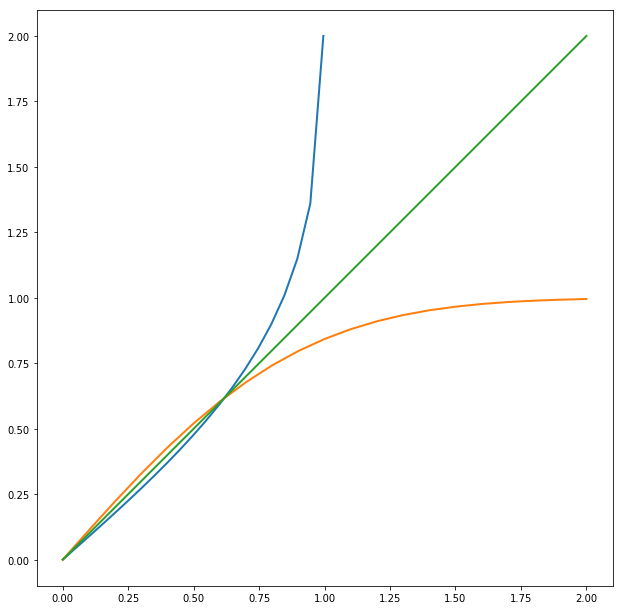

In [21]:
Fi_list = Summa(Xi_list, eps).copy()

SampleX, SampleY = [], []
for i in range(21):
    SampleX.append(i/10)
    SampleY.append(i/10)
    
fig= plt.figure(figsize=(10,10))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(F_list, Z_list, linewidth=2.0)
axes.plot(Xi_list, Fi_list,linewidth=2.0
         )
axes.plot(SampleX, SampleY ,linewidth=2.0)

<function show at 0x0000014A434F8D90>


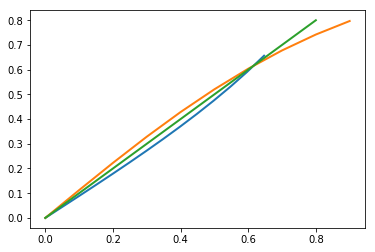

In [22]:
SampleX, SampleY = [], []
for i in range(9):
    SampleX.append(i/10)
    SampleY.append(i/10)
plt.plot(F_list[0:14], Z_list[0:14], linewidth=2.0)
plt.plot(Xi_list[0:10], Fi_list[0:10],linewidth=2.0)
plt.plot(SampleX[0:14], SampleY[0:14] ,linewidth=2.0)
print(plt.show)

In [23]:
eps = 0.0001 
b = 2
n= 20
iter = []
buf = Gauss(b, 2, 0, eps)[0]
F_list = []
for i in range(0,n+1):
    F_list.append(i/n*buf)
    iter.append(0)
    
def F(z, i):
    return Gauss(z, 2, 0, eps)[0] - F_list[i]

Xi_list = []
for i in range(0,n+1,1):
    Xi_list.append(i/n*2)
    
Z_list = [0]
for i in range(1, n+1):
    Z1 = Xi_list[i-1]
    Z2 = Xi_list[i]
    while(abs(F(Z2, i))>eps):
        buf = Z2
        iter[i] +=1
        Z2 = Z2 - (Z2-Z1)*F(Z2, i)/(F(Z2, i)-F(Z1, i))
        Z1 = buf
    Z_list.append(Z2) 

#for i in range(0,n+1,1):
#    print( F_list[i], ':', Z_list[i])
    
#Fi_list = Summa(Z_list, eps).copy()

#for i in range(0,n+1,1):
#    print( F_list[i], ':', Fi_list[i])

print(sum(iter))

92


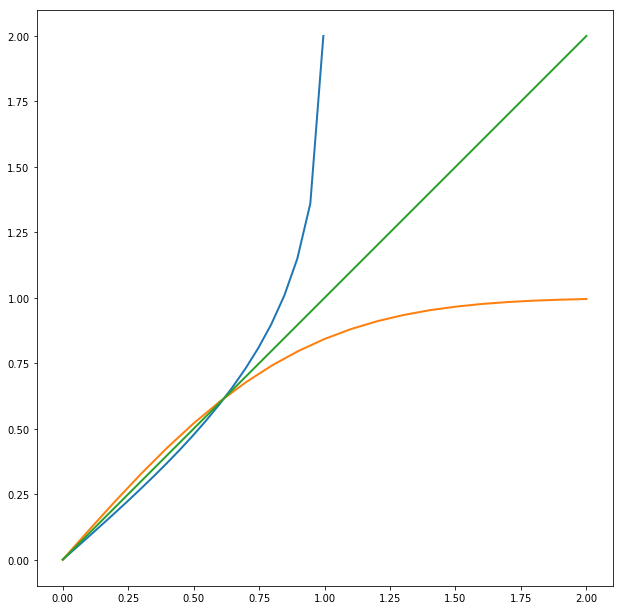

In [24]:
Fi_list = Summa(Xi_list, eps).copy()

SampleX, SampleY = [], []
for i in range(21):
    SampleX.append(i/10)
    SampleY.append(i/10)
    
fig= plt.figure(figsize=(10,10))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(F_list, Z_list, linewidth=2.0)
axes.plot(Xi_list, Fi_list,linewidth=2.0)
axes.plot(SampleX, SampleY ,linewidth=2.0)
plt.savefig('4Task')

In [28]:
eps = 0.0001 
b = 2
n= 40
iter = []
buf = Gauss(b, 2, 0, eps)[0]
F_list = []
for i in range(0,n+1):
    F_list.append(i/n*buf)
    iter.append(0)
    
def F(z, i):
    return Gauss(z, 2, 0, eps)[0] - F_list[i]

Xi_list = []
for i in range(0,n+1,1):
    Xi_list.append(i/n*2)
    
Z_list = [0]
for i in range(1, n+1):
    Z0 = Xi_list[i-1]
    ZK = Xi_list[n-i]
    while(abs(F(ZK, i))>eps):
        iter[i] +=1
        ZK = (Z0*F(ZK, i)-ZK*F(Z0, i))/(F(ZK, i)-F(Z0, i))
    Z_list.append(ZK) 

print(Z_list)

[0, 0.022069562278298042, 0.04413457986132978, 0.06625273096381558, 0.08843560314270604, 0.11069807649110766, 0.13305185669434502, 0.1556145659520718, 0.17829745956054566, 0.20117444559230802, 0.2242814819839526, 0.2475261995556765, 0.27109868047198155, 0.294961649555052, 0.31926767220640084, 0.3439034243111357, 0.3689827902326732, 0.3943830823573073, 0.4203805474423176, 0.44711188577252897, 0.47442389860889345, 0.5022692689344934, 0.5311802741701641, 0.5609399540839359, 0.5914986242831193, 0.6233523998800695, 0.6565941229831829, 0.6912926053342932, 0.7280645291390129, 0.7663165951839824, 0.8075645960572393, 0.8511275122778369, 0.8988992934210576, 0.950758689992551, 1.008317255781442, 1.0734511848829806, 1.1485644065736722, 1.240282406902892, 1.360497530186665, 1.5393398834550538, 1.9955896606099244]


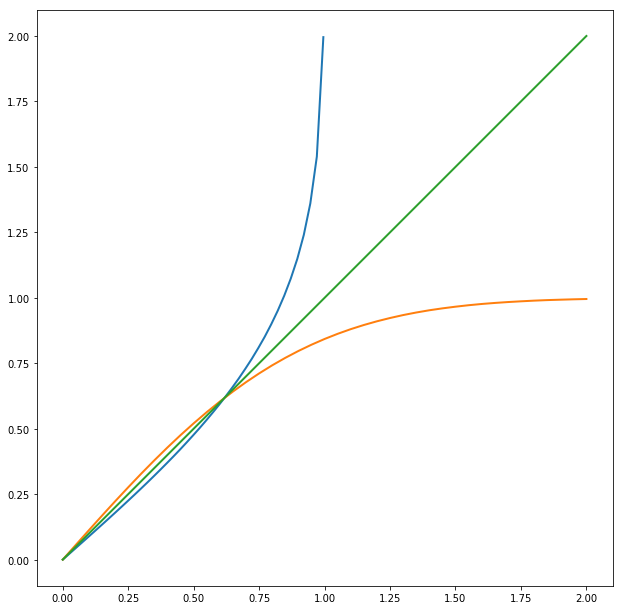

In [29]:
Fi_list = Summa(Xi_list, eps).copy()

SampleX, SampleY = [], []
for i in range(21):
    SampleX.append(i/10)
    SampleY.append(i/10)
    
fig= plt.figure(figsize=(10,10))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(F_list, Z_list, linewidth=2.0)
axes.plot(Xi_list, Fi_list,linewidth=2.0)
axes.plot(SampleX, SampleY ,linewidth=2.0)
plt.savefig('4Task2')